<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#모듈-불러오기" data-toc-modified-id="모듈-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>모듈 불러오기</a></span></li><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#데이터-탐색" data-toc-modified-id="데이터-탐색-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 탐색</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-&amp;-EDA" data-toc-modified-id="Preprocessing-&amp;-EDA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preprocessing &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#결측치-확인-및-변수-선별" data-toc-modified-id="결측치-확인-및-변수-선별-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>결측치 확인 및 변수 선별</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>One-Hot-Encoding</a></span></li></ul></li><li><span><a href="#데이터-분리" data-toc-modified-id="데이터-분리-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>데이터 분리</a></span></li></ul></li><li><span><a href="#하이퍼파라미터-튜닝" data-toc-modified-id="하이퍼파라미터-튜닝-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>하이퍼파라미터 튜닝</a></span><ul class="toc-item"><li><span><a href="#하이퍼파라미터-결정-(1)---K-(Euclidean-Distance-기준)" data-toc-modified-id="하이퍼파라미터-결정-(1)---K-(Euclidean-Distance-기준)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>하이퍼파라미터 결정 (1) - K (Euclidean Distance 기준)</a></span></li><li><span><a href="#하이퍼파라미터-결정-(2)---Distance-Measure" data-toc-modified-id="하이퍼파라미터-결정-(2)---Distance-Measure-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>하이퍼파라미터 결정 (2) - Distance Measure</a></span><ul class="toc-item"><li><span><a href="#Manhattan-Distance" data-toc-modified-id="Manhattan-Distance-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Manhattan Distance</a></span></li><li><span><a href="#Minkowski-Distance" data-toc-modified-id="Minkowski-Distance-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Minkowski Distance</a></span></li></ul></li></ul></li><li><span><a href="#번외" data-toc-modified-id="번외-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>번외</a></span></li></ul></div>

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

# 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, DistanceMetric, NearestNeighbors

from collections import Counter

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [3]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413
4997,1003015,P00141842,M,55+,6,C,0,1,5,14.0,NaN,7182


# 데이터 탐색

In [4]:
df.shape

(4998, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print()

1002063    12
1005795    12
1001980    11
1004344    11
1005831    10
           ..
1004220     1
1004224     1
1004228     1
1004236     1
1005571     1
Name: User_ID, Length: 2656, dtype: int64

P00265242    21
P00220442    16
P00147942    15
P00148642    15
P00145042    15
             ..
P00205842     1
P00005142     1
P00185342     1
P00266542     1
P00131742     1
Name: Product_ID, Length: 1797, dtype: int64

M    3765
F    1233
Name: Gender, dtype: int64

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64

B    2102
C    1555
A    1341
Name: City_Category, dtype: int64

1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: int64



* 주어진 데이터셋은 12개의 Column이 있는 4998개의 고객 신상 데이터이다.
* 고객 신상과 고객별 BlackFriday의 Purchase 정보가 함께 제시되어 있는 데이터셋이므로, `Purchase`를 Target으로 설정하는 것이 적절하다고 판단하였다. = KNN Regression 문제
* 각 Column별 의미와 Categorical Feature 여부는 아래 적어두었다.

**[Target]**
* `Purchase` : 구매량, Numerical

**[설명변수]**
* `User_ID` : 고객 ID, Categorical
* `Product_ID` : 제품 ID, Categorical
* `Gender` : 성별, Categorical
* `Age` : 나이대, Categorical
* `Occupation` : 직업, Categorical
* `City_Category` : 도시 분류, Categorical 
* `Stay_In_Current_City_Years` : 현재 도시에 거주한 년수, Categorical
* `Marital_Status` : 결혼 여부, Categorical (0 : Single / 1 : Married)
* `Product_Category_1`, `Product_Category_2`, `Product_Category_3` : 제품 분류 1, 제품 분류 2, 제품 분류 3, Categorical

## Preprocessing & EDA

### 결측치 확인 및 변수 선별

In [7]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [8]:
# Product_Category_2 결측치 채우기 (1)
# 제품 ID 앞 4자리를 기준으로 리스트 생성, 고유값 확인

product_id = []

for i in df.Product_ID.values:
    product_id.append(i[:4])     # 제품 ID를 앞 4자리만 추출하여 product_id 리스트에 추가 - 그룹화 목적

# product_id에서 중복 제거 후 고유값 추출
distinct_product_id = list(set(product_id))     
distinct_product_id

['P000', 'P001', 'P002', 'P003', 'P009']

In [9]:
# Product_Category_2 결측치 채우기 (2)
# 제품 ID 앞 4자리 기준으로 그룹화

P003_index = [i for i, value in enumerate(product_id) if value == 'P003']
P000_index = [i for i, value in enumerate(product_id) if value == 'P000']
P002_index = [i for i, value in enumerate(product_id) if value == 'P002']
P009_index = [i for i, value in enumerate(product_id) if value == 'P009']
P001_index = [i for i, value in enumerate(product_id) if value == 'P001']

print("제품 ID가 P003으로 시작하는 제품 개수:", len(P003_index))
print("제품 ID가 P000으로 시작하는 제품 개수:", len(P000_index))
print("제품 ID가 P002로 시작하는 제품 개수:", len(P002_index))
print("제품 ID가 P009로 시작하는 제품 개수:", len(P009_index))
print("제품 ID가 P001로 시작하는 제품 개수:", len(P001_index))
print('-'*50)
print(len(P003_index)+len(P000_index)+len(P002_index)+len(P009_index)+len(P001_index))

제품 ID가 P003으로 시작하는 제품 개수: 718
제품 ID가 P000으로 시작하는 제품 개수: 1229
제품 ID가 P002로 시작하는 제품 개수: 1282
제품 ID가 P009로 시작하는 제품 개수: 82
제품 ID가 P001로 시작하는 제품 개수: 1687
--------------------------------------------------
4998


In [10]:
# Product_Category_2 결측치 채우기 (3)
# 그룹별 Product_Category_2의 값을 빈도 높은 순으로 확인 

print(Counter(df.Product_Category_2[P003_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P000_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P002_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P009_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P001_index]).most_common()[:3])

[(8.0, 122), (15.0, 60), (14.0, 44)]
[(14.0, 189), (16.0, 130), (2.0, 129)]
[(8.0, 160), (14.0, 102), (2.0, 97)]
[(4.0, 25), (16.0, 11), (8.0, 11)]
[(2.0, 201), (8.0, 187), (14.0, 155)]


* **결측치 포함하는 Column** : `Product_Category_2`, `Product_Category_3`


* **`Product_Category_3`**
    * `Product_Category_3`의 결측치는 3454개로, 결측치가 전체 데이터(4998개)의 약 70% 가량을 차지한다. 
    * 결측치가 너무 많기에, 결측치를 채워넣는 과정에서 왜곡이 일어날 수 있겠다고 판단하였다. 따라서 해당 Column은 drop하기로 결정하였다.
    
    
* **`Product_Category_2`**
    * 결측치를 채워넣으려면 기준을 설정해야 하는데, 해당 Column은 제품 자체에 대한 정보이므로 관련성이 높은 `Product_ID` Column을 기준으로 결측치를 채우면 좋겠다고 판단하였다.
    * 이때 데이터 탐색 단계에서 `Product_ID`의 고유값들이 대체로 앞 4자리(`P00*`)를 기준으로 구분되는 것을 확인하였다. 그래서 `Product_ID`의 앞 4자리를 기준으로 데이터를 그룹화해보았는데, 전체 데이터가 5개의 그룹으로 나뉘어졌다. 
    * 그룹화 결과를 바탕으로, 그룹별 `Product_Category_2 `의 값을 빈도가 높은 순으로 확인하였다. 
    * 최종적으로 제품 코드가 `P003`으로 시작하는 제품은 `8.0`으로, `P000`으로 시작하는 제품은 `14.0`으로, `P002`로 시작하는 제품은 `8.0`으로, `P009`로 시작하는 제품은 `4.0`으로, 그리고 `P001`로 시작하는 제품은 `2.0`으로 결측치를 대체하기로 결론 내렸다.

* 나머지 Column 중에서 `User_ID`는 고객 ID, 즉 개개인을 식별하는 정보인데 데이터 탐색 결과 고유값이 전체 데이터 개수와 비교하여 너무 많았고(2656개), 해당 Column을 포함하여 모델링을 진행한다면 지나치게 Overfitting될 가능성을 고려해 drop하기로 결정하였다.

* **종합하면,**
    * `Product_Category_3`과 `User_ID`는 분석에서 제외(drop)하고,
    * `Product_Category_2`는 위에서 구한 값으로 결측치를 채운 후,
    * 남은 Categorical Feature에 대해서는 One-Hot-Encoding을 진행하여 데이터 전처리 및 EDA를 마칠 생각이다.

In [11]:
# Product_Category_3, User_ID drop
# 결측치 채우기

df_1 = df.drop(['Product_Category_3', 'User_ID'], axis = 1)     # 원본(df) 대신 새로운 변수(df_1) 선언

for i in P003_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 8.0
for i in P000_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 14.0
for i in P002_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 8.0
for i in P009_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 4.0
for i in P001_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 2.0

df_1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,P00347742,F,0-17,10,A,1,0,7,8.0,4483
2,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,P00358242,M,55+,1,C,1,1,8,8.0,2045
4995,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,P00336742,M,55+,0,C,2,1,12,8.0,1413


In [12]:
df_1.isnull().sum()     # 결측치 처리 확인

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

### One-Hot-Encoding
* One-Hot-Encoding을 진행해야 하는 Categorical Features : `Product_ID`, `Gender`, `Age`, `Occupation`, `City_Category`, `Stay_In_Current_City_Years`, `Product_Category_1`, `Product_Category_2` (`Marital_Status`, `Purchase` 제외한 모든 Column)
    * 이때, `Product_ID`는 앞서 설정한 기준(그룹 단위)으로 One-Hot-Encoding을 진행한다.

In [13]:
# One-Hot-Encoding (1)

categorical_1 = ['Gender', 'Age', 'Occupation', 'City_Category', 
                 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2']

encoder_1 = OneHotEncoder().fit(df_1[categorical_1])     # One-Hot-Encoding
encoder_1.get_feature_names(categorical_1)     # 각 Feature 이름 확인

array(['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9',
  

In [14]:
# One-Hot-Encoding (2) - Product_ID Column

for i in P003_index:     # 먼저 제품 ID 값을 각 제품 ID의 4번째 숫자로 대체 - 그룹화
    df_1.iloc[i, 0] = 3
for i in P000_index:
    df_1.iloc[i, 0] = 0
for i in P002_index:
    df_1.iloc[i, 0] = 2
for i in P009_index:
    df_1.iloc[i, 0] = 9
for i in P001_index:
    df_1.iloc[i, 0] = 1

encoder_2 = OneHotEncoder().fit(df_1[['Product_ID']])     # One-Hot-Encoding
encoder_2.get_feature_names(['Product_ID'])   

array(['Product_ID_0', 'Product_ID_1', 'Product_ID_2', 'Product_ID_3',
       'Product_ID_9'], dtype=object)

In [15]:
# 최종 DataFrame 도출

endcoded_data_1 = pd.DataFrame(encoder_1.transform(df_1[categorical_1]).toarray(),
                               index = df_1.index,
                               columns = encoder_1.get_feature_names(categorical_1))     # One-Hot-Encoding (1)의 결과를 DataFrame으로!
endcoded_data_2 = pd.DataFrame(encoder_2.transform(df_1[['Product_ID']]).toarray(),
                               index = df_1.index,
                               columns = encoder_2.get_feature_names(['Product_ID']))     # One-Hot-Encoding (2)의 결과를 DataFrame으로!

# 위에서 만들어진 DataFrame과 기존 DataFrame concat한 후, One-Hot-Encoding 이전 Categorical Column들은 drop!

df_2 = pd.concat([df_1, endcoded_data_1], sort = False, axis = 1)
df_3 = pd.concat([df_2, endcoded_data_2], sort = False, axis = 1)
df_3 = df_3.drop(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
                  'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2'], axis = 1)

df_3

,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_ID_0,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_9
0,0,2010,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,4483,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,7696,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,16429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,5780,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,11701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4994,1,2045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4995,1,4505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,1,1413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df_3.info()     # 최종 DataFrame 구성 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 4998 non-null   int64  
 1   Purchase                       4998 non-null   int64  
 2   Gender_F                       4998 non-null   float64
 3   Gender_M                       4998 non-null   float64
 4   Age_0-17                       4998 non-null   float64
 5   Age_18-25                      4998 non-null   float64
 6   Age_26-35                      4998 non-null   float64
 7   Age_36-45                      4998 non-null   float64
 8   Age_46-50                      4998 non-null   float64
 9   Age_51-55                      4998 non-null   float64
 10  Age_55+                        4998 non-null   float64
 11  Occupation_0                   4998 non-null   float64
 12  Occupation_1                   4998 non-null   f

In [17]:
X = df_3.drop(['Purchase'], axis = 1)     # 설명변수
y = df_3.Purchase     # Target

## 데이터 분리
* 먼저, 전체 Data를 Train Data(학습용 Data) / Test Data(평가용 Data)로 분리한 후 모델링을 진행하자.

In [18]:
y.value_counts()

5328     6
7001     6
7063     6
8115     6
6970     5
        ..
19543    1
11717    1
1784     1
5200     1
8192     1
Name: Purchase, Length: 3736, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)     # random_state : seed값 설정

In [20]:
print(X_train.shape)
print(X_test.shape)

(3748, 81)
(1250, 81)


* 전체 4998개의 Data 중 약 75%(`train_test_split` 기본값)가 Train Data로, 나머지 25%가 Test Data로 분류되었다.
* 설명변수는 모두 Categorical이므로, 데이터 스케일링은 진행하지 않는다.

# 하이퍼파라미터 튜닝

## 하이퍼파라미터 결정 (1) - K (Euclidean Distance 기준)
* K(# of nearest neighbors)를 바꿔가면서(for loop 활용), 언제 정확도(Accuracy)가 가장 높아지는지 확인해보자.
* K의 범위는 임의로 1 이상, 30 이하로 제한하였다.
* 가장 널리 쓰이는 Distance Measure인 Euclidean Distance를 기준으로 한다. 차후 다른 Distance Measure과 비교한다.

In [21]:
k_range = range(1, 31)
train_accuracy = []
test_accuracy = []

for k in tqdm_notebook(k_range):
    reg = KNeighborsRegressor(n_neighbors = k)     # default : weights = 'uniform(가중치 없음)', p = 2 (standard Euclidean metric)
    reg.fit(X_train, y_train)
    train_accuracy.append(reg.score(X_train, y_train))     # Train Data에 대한 결정계수
    test_accuracy.append(reg.score(X_test, y_test))     # Test Data에 대한 결정계수

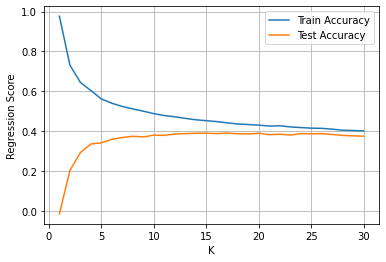

In [22]:
# K 변화에 따른 Accuracy 변화 시각화

plt.plot(k_range, train_accuracy, label = "Train Accuracy")
plt.plot(k_range, test_accuracy, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Regression Score")
plt.grid()
plt.legend()
plt.show()

* 하이퍼파라미터 K를 변화시키면서 `Train Data`, `Test Data`에 대한 결정계수를 살펴보았다.
    * `Train Data`에 대해서는 K가 커질수록 결정계수가 떨어지는 경향이,
    * `Test Data`에 대해서는 K가 커질수록 결정계수가 높아지는 경향이 나타난다.
    * 직관적 이해를 위해 이제부터는 결정계수를 'Accuracy'로 칭하겠다.

* 이번에는 순위를 구해보자. 
    * 아래는 `train_accuracy`와 `test_accuracy`를 각각 내림차순 정렬한 후, 상위 15개 값(상위 50%)의 index만 추출한 것이다.
    * `train_accuracy`와 `test_accuracy`가 모두 높은 K가 가장 이상적일 것으로 판단하여, 교집합 원소도 맨 아래에 함께 추출했다.

In [23]:
train_rank_15 = pd.Series(train_accuracy).sort_values(ascending = False).index[:15]
test_rank_15 = pd.Series(test_accuracy).sort_values(ascending = False).index[:15]

print(train_rank_15)
print(test_rank_15)
print()
print(train_rank_15.intersection(test_rank_15))     # train_rank_15와 test_rank_15의 교집합

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
Int64Index([16, 14, 13, 19, 15, 12, 25, 23, 17, 24, 18, 11, 21, 26, 20], dtype='int64')

Int64Index([11, 12, 13, 14], dtype='int64')


* 위 결과는 index 기준이므로, `train_accuracy`와 `test_accuracy` 모두에서 상위 50% 안에 드는 K는 12, 13, 14, 15.

* 모델링 과정에서 문제점이 발견되었는데, Accuracy가 비교적 낮게 나왔다는 점이다. 바로 '차원의 저주(Curse of Dimensionality)' 때문이다.
* KNN과 같은 거리 기반 모델의 경우, Feature 수가 많아지면(차원이 커지면) 데이터 간 거리가 점점 멀어져 모델의 설명력이 떨어지게 된다. 즉, 모델의 성능이 저하되는 것이다.
    * 이와 같은 문제를 해결하기 위해서는 **1) 더 많은 데이터를 수집하거나, 2) 차원 축소 방법을 이용**하는 것인데 현재로서 1)은 어렵다. 이미 주어진 데이터셋에서 75%를 Train Data로 활용하고 있으므로, Train Data의 비율을 늘리면 모델이 Train Data에 맞추어 Overfitting될 위험이 함께 높아지기 때문이다.
    * 따라서, **2) 차원 축소 방법을 이용해 KNN Regression의 Accuracy를 높여보려고 한다.**
* 참고 : 차원의 저주 KNN으로 쉽게 이해하기 (https://modern-manual.tistory.com/4)

In [24]:
# 원본 DataFrame을 'Occupation'을 기준으로 그룹화한 후,
# 그룹별 평균을 구해 Purchase 기준으로 오름차순 정렬한 결과

grouped = df.groupby(['Occupation']).mean().sort_values(by = ['Purchase'])
grouped

,User_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,,,,,,
19,1.002968e+06,0.150685,5.123288,10.208333,12.277778,8170.465753
6,1.003286e+06,0.489247,6.069892,10.491379,13.756757,8402.354839
0,1.002974e+06,0.445804,5.412587,10.214106,12.953757,8732.351399
10,1.002530e+06,0.073770,4.975410,9.369048,12.128205,8897.926230
20,1.002770e+06,0.477193,5.705263,9.904255,12.194444,8900.733333
11,1.002714e+06,0.463158,5.536842,9.661290,13.617647,8925.147368
13,1.002509e+06,0.446154,5.692308,9.840909,13.909091,8964.907692
4,1.003051e+06,0.260623,5.184136,9.209677,12.545455,9066.113314
16,1.003150e+06,0.483607,5.364754,9.839080,12.800000,9102.409836


* 고유값이 21개인 `Occupation` column을 기준으로 원본 DataFrame을 그룹화한 후, 그룹별 `Purchase`(Target)의 평균을 오름차순 정렬해보았다.
* `Occupation`별 `Purchase`의 평균을 기준으로 Occupation column을 3개의 column으로 One-Hot-Encoding 해보자.

In [25]:
Occupation_Low = list(grouped.index[:7])
Occupation_Medium = list(grouped.index[7:14])
Occupation_High = (grouped.index[14:])

print("평균 Purchase가 Low인 Occupation : ", Occupation_Low)
print("평균 Purchase가 Medium인 Occupation : ", Occupation_Medium)
print("평균 Purchase가 High인 Occupation : ", Occupation_High)

평균 Purchase가 Low인 Occupation :  [19, 6, 0, 10, 20, 11, 13]
평균 Purchase가 Medium인 Occupation :  [4, 16, 2, 1, 3, 7, 18]
평균 Purchase가 High인 Occupation :  Int64Index([5, 14, 17, 9, 15, 12, 8], dtype='int64', name='Occupation')


In [26]:
for i in range(len(df_1.Occupation.values)):
    if df_1.Occupation.values[i] in Occupation_Low:
        df_1.iloc[i, 3] = 1
    elif df_1.Occupation.values[i] in Occupation_Medium:
        df_1.iloc[i, 3] = 2
    elif df_1.Occupation.values[i] in Occupation_High:
        df_1.iloc[i, 3] = 3

df_1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,F,0-17,1,A,3,0,5,17.0,2010
1,3,F,0-17,1,A,1,0,7,8.0,4483
2,0,F,0-17,1,A,1,0,1,4.0,7696
3,1,F,0-17,1,A,3,0,2,4.0,16429
4,1,F,0-17,1,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,1,M,55+,2,C,1,1,1,16.0,11701
4994,3,M,55+,2,C,1,1,8,8.0,2045
4995,1,M,55+,1,C,3,1,1,6.0,4505
4996,3,M,55+,1,C,2,1,12,8.0,1413


In [27]:
# Occupation별 Purchase의 평균을 기준으로 Occupation column One-Hot-Encoding

encoder_3 = OneHotEncoder().fit(df_1[['Occupation']])     # One-Hot-Encoding
encoder_3.get_feature_names(['Occupation'])

array(['Occupation_1', 'Occupation_2', 'Occupation_3'], dtype=object)

In [28]:
# 최종 DataFrame 도출

endcoded_data_3 = pd.DataFrame(encoder_3.transform(df_1[['Occupation']]).toarray(),
                               index = df_1.index,
                               columns = ['Occupation_Low', 'Occupation_Medium', 'Occupation_High'])

# 위에서 만들어진 DataFrame과 기존 DataFrame(df_3)을 concat,
# Occupation 관련 column은 모두 drop

occupation_grouped_df = pd.concat([df_3, endcoded_data_3], sort = False, axis = 1)
occupation_grouped_df.drop(['Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
                            'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
                            'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14', 
                            'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20'], 
                           axis = 1, inplace = True)

occupation_grouped_df

,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_2_17.0,Product_Category_2_18.0,Product_ID_0,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_9,Occupation_Low,Occupation_Medium,Occupation_High
0,0,2010,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,4483,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,7696,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,16429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,5780,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,11701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4994,1,2045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4995,1,4505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4996,1,1413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
occupation_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 4998 non-null   int64  
 1   Purchase                       4998 non-null   int64  
 2   Gender_F                       4998 non-null   float64
 3   Gender_M                       4998 non-null   float64
 4   Age_0-17                       4998 non-null   float64
 5   Age_18-25                      4998 non-null   float64
 6   Age_26-35                      4998 non-null   float64
 7   Age_36-45                      4998 non-null   float64
 8   Age_46-50                      4998 non-null   float64
 9   Age_51-55                      4998 non-null   float64
 10  Age_55+                        4998 non-null   float64
 11  City_Category_A                4998 non-null   float64
 12  City_Category_B                4998 non-null   f

* 이제 새롭게 만들어진 DataFrame `occupation_grouped_df`로 다시 KNN Regression을 구현해보자. 
    * 코드는 앞서 `df_3`를 활용하여 KNN Regression을 구현했을 때와 동일하다.

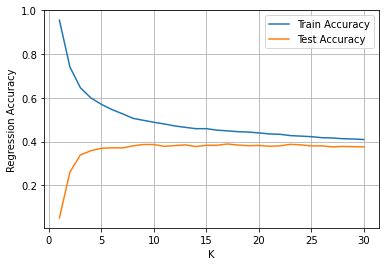

In [32]:
# 설명변수와 Target

X = occupation_grouped_df.drop(['Purchase'], axis = 1)     # 설명변수
y = occupation_grouped_df.Purchase     # Target

# 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# KNN Regression 구현

k_range = range(1, 31)     # K의 범위는 임의로 1 이상, 30 이하로 제한
train_accuracy = []
test_accuracy = []

for k in tqdm_notebook(k_range):
    reg = KNeighborsRegressor(n_neighbors = k, p = 2)     # default : weights = 'uniform(가중치 없음)'
    reg.fit(X_train, y_train)
    train_accuracy.append(reg.score(X_train, y_train))     # Train Data에 대한 정확도(Accuracy)
    test_accuracy.append(reg.score(X_test, y_test))     # Test Data에 대한 정확도(Accuracy)
    
# K 변화에 따른 Accuracy 변화 시각화

plt.plot(k_range, train_accuracy, label = "Train Accuracy")
plt.plot(k_range, test_accuracy, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Regression Accuracy")
plt.grid()
plt.legend()
plt.show()

* `Occupation`별 `Purchase`의 평균을 기준으로 One-Hot-Encoding을 진행한 결과, Accuracy가 이전과 비교하여 조금 더 높아졌음을 확인할 수 있다.
* 앞서 정리했듯이 KNN은 거리 계산에 기반한 모델이므로, 이와 같은 차원 축소 과정을 반복하여 Feature 수를 줄여나간다면 Accuracy를 유의미하게 높일 수 있을 것으로 기대된다.

In [33]:
# train_accuracy와 test_accuracy를 각각 내림차순 정렬한 후, 상위 9개 값(상위 30%)의 index만 추출

train_rank_9 = pd.Series(train_accuracy).sort_values(ascending = False).index[:9]
test_rank_9 = pd.Series(test_accuracy).sort_values(ascending = False).index[:9]

print(train_rank_9)
print(test_rank_9)
print()
print(train_rank_9.intersection(test_rank_9))     # train_rank_9와 test_rank_9의 교집합

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([16, 22, 8, 9, 23, 12, 17, 14, 15], dtype='int64')

Int64Index([8], dtype='int64')


* 위 결과는 index 기준이므로, train_accuracy와 test_accuracy 모두에서 상위 30% 안에 드는 K는 9에 해당한다.

**<참고 - 교차 검증으로 정확도 비교하기>**
* 교차 검증(Cross Validation)을 통해 K 변화에 따른 Accuracy 변화를 확인한 후, 하이퍼파라미터 K를 결정할 수도 있다. `sklearn.model_selection.cross_val_score`을 활용하면 된다.
* 마찬가지로 Euclidean Distance를 기준(`KNeighborsRegressor`에서 `p = 2`)으로 확인해보자.

In [34]:
cv_scores = []

for k in tqdm_notebook(k_range):
    cv_reg = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(cv_reg, X_train, y_train)
    cv_scores.append(scores.mean())

In [35]:
max_acc = np.max(cv_scores)     # Accuracy의 최댓값

best_k = [k_range[i] for i in range(len(cv_scores))     # best_k : Accuracy를 최대로 하는 K를 저장하는 리스트
         if cv_scores[i] == max_acc]

print(max_acc)
print("Besk K Value :", best_k)

0.37148163557561603
Besk K Value : [12]


In [36]:
pd.Series(cv_scores).sort_values(ascending = False).index[:9]     # 정확도가 높은 순서대로 index 추출

Int64Index([11, 10, 19, 12, 17, 16, 13, 18, 20], dtype='int64')

In [37]:
pd.Series(cv_scores).sort_values(ascending = False).index[:9] + 1     # 정확도가 높은 순서대로 K값(index+1) 추출

Int64Index([12, 11, 20, 13, 18, 17, 14, 19, 21], dtype='int64')

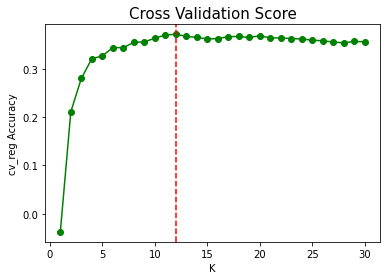

In [38]:
plt.plot(k_range, cv_scores, 'go-')
plt.title("Cross Validation Score", fontsize = 15)
plt.xlabel("K")
plt.ylabel("cv_reg Accuracy")
plt.axvline(best_k[0], color = "r", linestyle = "--")
plt.show()

* 교차 검증 결과, 상위 30% 안에 드는 K값은 12, 11, 20, 13, 18, 17, 14, 19, 21이고, 
* 그중에서 K = 12일 때 Accuracy가 가장 높다.
* 앞선 결론에서 최적의 K는 9였는데, Cross Validation Score를 시각화한 그래프를 보면 K = 9 이상에서는 점수 차가 별로 유의미해보이지 않는다. 따라서, 교차 검증 결과를 함께 고려하면 K가 9 이상으로 제한되어야 비교적 타당한 Regression 결과를 기대할 수 있겠다.

## 하이퍼파라미터 결정 (2) - Distance Measure
* **4.1 하이퍼파라미터 결정 (1) - K** 단계에서는 Euclidean Distance를 기준으로 모델링하였다.
* 이제는 Euclidean Distance를 제외한 다른 Distance Measure를 이용해 모델링을 진행해보자.
    * Manhattan Distance
    * Minkowski Distance

### Manhattan Distance
* 좌표축 방향으로만 이동할 경우에 계산되는 거리
* 가로 길이 + 세로 길이
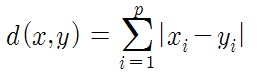

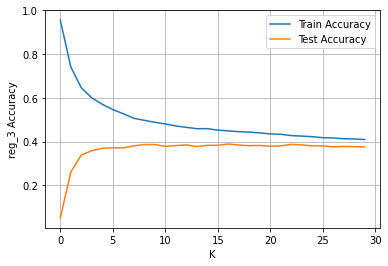

In [39]:
train_accuracy_3 = []
test_accuracy_3 = []

for k in tqdm_notebook(range(1, 31)):
    reg_3 = KNeighborsRegressor(n_neighbors = k, p = 1, metric = "manhattan")     # Manhattan Distance
    reg_3.fit(X_train, y_train)
    
    y_train_pred = reg_3.predict(X_train)   # X_train에 대한 예측값
    train_accuracy_3.append(reg_3.score(X_train, y_train))     # Train Data에 대한 정확도(Accuracy)
    
    y_test_pred = reg_3.predict(X_test)   # X_test에 대한 예측값
    test_accuracy_3.append(reg_3.score(X_test, y_test))

# K 변화에 따른 Accuracy 변화 시각화

plt.plot(train_accuracy_3, label = 'Train Accuracy')
plt.plot(test_accuracy_3, label = 'Test Accuracy')
plt.xlabel("K")
plt.ylabel("reg_3 Accuracy")
plt.grid()
plt.legend()
plt.show()

In [40]:
# Manhattan Distance 기준 정확도 순위 구하기

manhattan_train_rank = pd.Series(train_accuracy_3).sort_values(ascending = False).index[:9]
manhattan_test_rank = pd.Series(test_accuracy_3).sort_values(ascending = False).index[:9]

print(manhattan_train_rank)
print(manhattan_test_rank)
print()
print(manhattan_train_rank.intersection(manhattan_test_rank))

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([16, 22, 8, 9, 23, 12, 17, 14, 15], dtype='int64')

Int64Index([8], dtype='int64')


* Manhattan Distance를 기준으로 하면, K = 9일 때 비교적 Accuracy가 높다.

### Minkowski Distance
* Euclidean Distance와 Manhattan Distance의 일반화
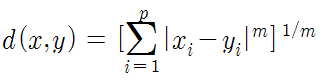

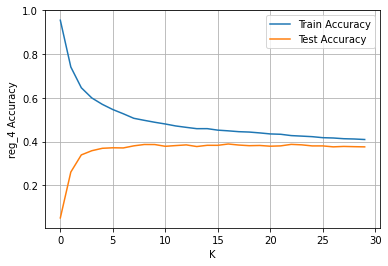

In [41]:
train_accuracy_4 = []
test_accuracy_4 = []

for k in tqdm_notebook(range(1, 31)):
    reg_4 = KNeighborsRegressor(n_neighbors = k, p = 3, metric = "minkowski")     # Minkowski Distance
    reg_4.fit(X_train, y_train)
    
    y_train_pred = reg_4.predict(X_train)   # X_train에 대한 예측값
    train_accuracy_4.append(reg_4.score(X_train, y_train))     # Train Data에 대한 정확도(Accuracy)
    
    y_test_pred = reg_4.predict(X_test)   # X_test에 대한 예측값
    test_accuracy_4.append(reg_4.score(X_test, y_test))

# K 변화에 따른 Accuracy 변화 시각화

plt.plot(train_accuracy_4, label = 'Train Accuracy')
plt.plot(test_accuracy_4, label = 'Test Accuracy')
plt.xlabel("K")
plt.ylabel("reg_4 Accuracy")
plt.grid()
plt.legend()
plt.show()

In [42]:
# Minkowski Distance 기준 정확도 순위 구하기

minkowski_train_rank = pd.Series(train_accuracy_4).sort_values(ascending = False).index[:9]
minkowski_test_rank = pd.Series(test_accuracy_4).sort_values(ascending = False).index[:9]

print(minkowski_train_rank)
print(minkowski_test_rank)
print()
print(minkowski_train_rank.intersection(minkowski_test_rank))

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([16, 22, 8, 9, 23, 12, 17, 14, 15], dtype='int64')

Int64Index([8], dtype='int64')


* Minkowski Distance 기준일 때도 마찬가지로, K = 9일 때 비교적 Accuracy가 높다.

* 지금까지 확인한 내용을 종합해서 최종적으로 하이퍼파라미터를 결정해보면, **K = 9**일 때 모델 성능이 가장 우수할 것으로 생각된다.

# 번외

* 초기 One-Hot-Encoding의 결과를 보면 `Product_Category_1`, `Product_Category_2`로 인해 Feature 수가 급증하고 있는데, 그래서 이번에는 `Product_ID`만으로도 제품에 대한 정보를 반영할 수 있다는 가정 하에 새로운 모델링을 해보았다(제품 분류가 어떤 기준으로 되는 것인지에 대한 정보가 없어서 해당 Feature들을 drop하지 않았는데, 제품 ID의 앞 4자리가 몇 개의 그룹으로 묶일 수 있으므로 사실상 이 앞 4자리가 분류와 연관이 있을 것도 같다).

In [44]:
# occupation_grouped_df의 Feature 확인

occupation_grouped_df.columns

Index(['Marital_Status', 'Purchase', 'Gender_F', 'Gender_M', 'Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20',
       'Product_Category_2_2.0', 'Product_Category_

In [45]:
# 기존 occupation_grouped_df에서 Product_Category로 시작하는 column 모두 drop한 후, 새로운 DataFrame 생성

new_df = occupation_grouped_df.drop(['Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
                            'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
                            'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
                            'Product_Category_1_11', 'Product_Category_1_12', 'Product_Category_1_13', 
                            'Product_Category_1_14', 'Product_Category_1_15', 'Product_Category_1_16',
                            'Product_Category_1_17', 'Product_Category_1_18', 'Product_Category_1_19', 'Product_Category_1_20',
                            'Product_Category_2_2.0', 'Product_Category_2_3.0', 'Product_Category_2_4.0', 'Product_Category_2_5.0',
                            'Product_Category_2_6.0', 'Product_Category_2_7.0', 'Product_Category_2_8.0', 'Product_Category_2_9.0',
                            'Product_Category_2_10.0', 'Product_Category_2_11.0', 'Product_Category_2_12.0', 'Product_Category_2_13.0',
                            'Product_Category_2_14.0', 'Product_Category_2_15.0', 'Product_Category_2_16.0', 'Product_Category_2_17.0',
                            'Product_Category_2_18.0'], axis = 1)
new_df

,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Stay_In_Current_City_Years_4+,Product_Category_1_1,Product_ID_0,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_9,Occupation_Low,Occupation_Medium,Occupation_High
0,0,2010,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,4483,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,7696,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,16429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,5780,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,11701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4994,1,2045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4995,1,4505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4996,1,1413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


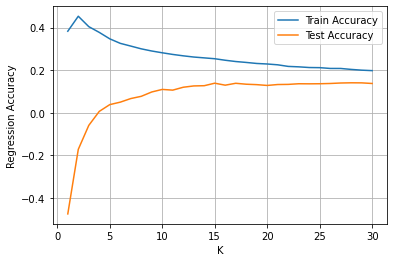

In [46]:
# 설명변수와 Target
# occupation_grouped_df에서 Product_Category로 시작하는 column 모두 drop한 new_df 활용

X = new_df.drop(['Purchase'], axis = 1)     # 설명변수
y = new_df.Purchase     # Target

# 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# KNN Regression 구현

k_range = range(1, 31)     # K의 범위는 임의로 1 이상, 30 이하로 제한
train_accuracy = []
test_accuracy = []

for k in tqdm_notebook(k_range):
    reg = KNeighborsRegressor(n_neighbors = k)     # default : weights = 'uniform(가중치 없음)'
    reg.fit(X_train, y_train)
    train_accuracy.append(reg.score(X_train, y_train))     # Train Data에 대한 정확도(Accuracy)
    test_accuracy.append(reg.score(X_test, y_test))     # Test Data에 대한 정확도(Accuracy)
    
# K 변화에 따른 Accuracy 변화 시각화

plt.plot(k_range, train_accuracy, label = "Train Accuracy")
plt.plot(k_range, test_accuracy, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Regression Accuracy")
plt.grid()
plt.legend()
plt.show()

In [47]:
# 정확도 순위 구하기

train_rank = pd.Series(train_accuracy).sort_values(ascending = False).index[:15]
test_rank = pd.Series(test_accuracy).sort_values(ascending = False).index[:15]

print(train_rank)
print(test_rank)
print()
print(train_rank.intersection(test_rank))

Int64Index([1, 2, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
Int64Index([27, 28, 26, 14, 16, 29, 25, 24, 22, 23, 17, 21, 20, 18, 15], dtype='int64')

Int64Index([14], dtype='int64')


* 이 경우, K = 15일 때 정확도가 가장 높다.
* 같은 데이터셋이더라도, 변수 선별 방식에 따라서 다양한 모델링이 가능하며, 최적의 하이퍼파라미터 역시 달라진다.